# How to Develop MLPs for Time Series Forecasting
how to develop a suite of MLP models for time series forecasting

This tutorial is divided
into four parts; they are:
1. Univariate MLP Models
2. Multivariate MLP Models
3. Multi-step MLP Models
4. Multivariate Multi-step MLP Models

the most promising area in the application of deep
learning methods to time series forecasting are in the use of CNNs, LSTMs and hybrid models

This section is divided into two parts; they are:
1. Data Preparation
2. MLP Model

In [18]:

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [22]:
# univariate data preparation
from numpy import array
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90


# MLP Model
A simple MLP model has a single hidden layer of nodes, and an output layer used to make a
prediction. 

In [26]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
print(x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[70 80 90]]
[[100.10007]]


I have two columns in my data file with 5000 rows, column 1 is time (with 1 hour interval) and column 2 is bits/sec and I am trying to forecast bits/sec. In that case help me to set sample, time step and feature [for LSTMs]?

### LSTM

There are few problems here:

* LSTMs expect 3D input, and it can be challenging to get your head around this the first time.
* LSTMs don’t like sequences of more than 200-400 time steps, so the data will need to be split into samples.

In [29]:
## generate mcok data
from numpy import array
 
# load...
data = list()
n = 5000
for i in range(n):
	data.append([i+1, (i+1)*10])
data = array(data)
print(data[:5, :])
print(data.shape)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


In [30]:

# drop time
data = data[:, 1]
print(data.shape)

(5000,)


LSTMs work better with 200-to-400 time steps 

Therefore, we need to split the 5,000 time steps into multiple shorter sub-sequences.

In [35]:

# split into samples (e.g. 5000/200 = 25)
samples = list()
length = 200
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
    # grab from i to i + 200
    sample = data[i:i+length]
    samples.append(sample)
print(len(samples))

25


In [36]:
# convert list of arrays into 2d array
data = array(samples)
print(data.shape)

(25, 200)


In [37]:

# reshape into [samples, timesteps, features]
# expect [25, 200, 1]
data = data.reshape((len(samples), length, 1))
print(data.shape)

(25, 200, 1)


In [38]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [39]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [40]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[83.3601]]


Deep learning neural networks are capable of automatically learning and extracting features from raw data.

This feature of neural networks can be used for time series forecasting problems, where models can be developed directly on the raw observations without the direct need to scale the data using normalization and standardization or to make the data stationary by differencing.

In [44]:
from pandas import read_csv
# Load
df = read_csv('monthly-car-sales.csv', header=0, index_col=0)

In [45]:
print(df.shape)

(108, 1)


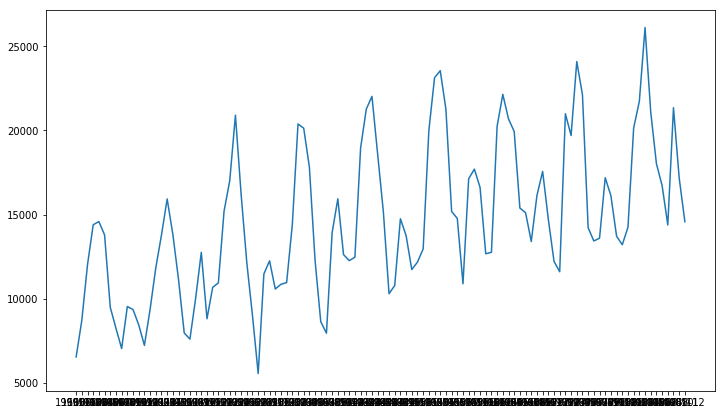

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(df)
plt.show()

In [49]:
# split a univariate time series into train/test sets

def train_test_split(data,n_test):
    return data[:-n_test],data[-n_test:]


In [ ]:
def series_to_supervised(data,n_in,n_out):
    

In [ ]:
n_in =1, n_out=1
df = DataFrame(data)
cols = list()
for i in range(n_in,0,-1):
    cols.append(df.shift(i))


In [72]:

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
    df = DataFrame(data)
    cols = list()
    for i in range(1,0,-1):
        cols.append(df.shift(1))
    for i in range(0,n_out):
        cols.append(df.shift(-1))
    agg = concat(cols,axis=1)
    agg.dropna(inplace = True)
    return agg.values

In [73]:
from pandas import DataFrame
from pandas import concat
x = series_to_supervised(df)



### Walk-Forward Validation

Walk-forward validation is an approach where the model makes a forecast for each observation in the test dataset one at a time.
fter each forecast is made for a time step in the test dataset, the true observation for the forecast is added to the test dataset and made available to the model.